In [1]:
%load_ext autoreload
%autoreload 2

from ff_energy.ffe.utils import read_from_pickle, PKL_PATH

# from ff_energy.structure import
from ff_energy.ffe.potential import LJ
from ff_energy.ffe.ff import FF
import numpy as np
from ff_energy.ffe.data import Data  # , plot_ecol, plot_intE
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd

# from ff_energy.utils import *
from ff_energy.ffe.data import Data
from ff_energy.ffe.plot import plot_energy_MSE

sig_bound = (0.5, 4.0)
ep_bound = (0.00001, 1.0)
LJ_bound = [(sig_bound), (sig_bound), (ep_bound), (ep_bound)]

#  Load data

In [2]:
p = PKL_PATH / "water_cluster/pbe0dz/pbe0_dz.kmdcm"
data_ = Data(p)

output_path /home/boittier/Documents/phd/ff_energy/pickles/water_cluster/pbe0dz/pbe0_dz.kmdcm
loading pickles from  /home/boittier/Documents/phd/ff_energy/pickles/water_cluster/pbe0dz/pbe0_dz.kmdcm
Strcuture,PDB already already exists, loading structure from pickle
Index(['m_ENERGY', 'KEY', 'key', 'monomer', 'a', 'r1', 'r2'], dtype='object')
Index(['m_ENERGY', 'monomer', 'a', 'r1', 'r2'], dtype='object')
Fitting parameters: kb, ka, r0, a0


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/bonded_terms.py:78: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(


df Index(['m_ENERGY', 'KEY', 'key', 'monomer', 'a', 'r1', 'r2'], dtype='object')
sum_monomer_df Index(['m_ENERGY', 'monomer', 'a', 'r1', 'r2', 'E_pred', 'SE', 'm_E_tot',
       'p_m_E_tot'],
      dtype='object')


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/bonded_terms.py:97: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  self.sum_monomer_df = self.get_loss_df(self.x).groupby(


#  Plot Fits

In [3]:
data_.__dict__.keys()

dict_keys(['system', 'output_path', 'output', 'data', 'coloumb', 'ctot', 'chm_df', 'monomers_df', 'monomer_df', 'cluster_df', 'pairs_df', 'structures', 'pdbs', 'structure_key_pairs', 'min_m_E', 'bonded_fit'])

In [4]:
# data_.output

In [5]:
data_.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,-113.436686,test467,22.56645,-64.08560,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,958349.117867,-958295.211613,-958345.566652
test263,-159.213355,test263,21.29141,-92.76477,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,958347.989140,-958296.144723,-958359.139096
test35,-138.530827,test35,23.43646,-87.37824,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,958356.057316,-958288.376060,-958359.343368
test223,-85.840765,test223,24.37323,-47.13218,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,958353.297326,-958290.449867,-958324.530348
test254,-157.431989,test254,27.07465,-90.75359,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,958360.820083,-958283.041923,-958345.890067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,25.63059,-66.67887,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,958357.178250,-958287.528329,-958328.955198
test304,-123.903711,test304,23.20412,-72.62700,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,958351.146070,-958293.116887,-958347.451339
test327,-195.846922,test327,21.75196,-117.28678,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,958349.201570,-958295.335953,-958385.682737
test185,-114.232038,test185,25.65796,-69.10066,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,958354.901870,-958289.053296,-958342.904458


##  Coulomb energy

2.5608014994581034e-245


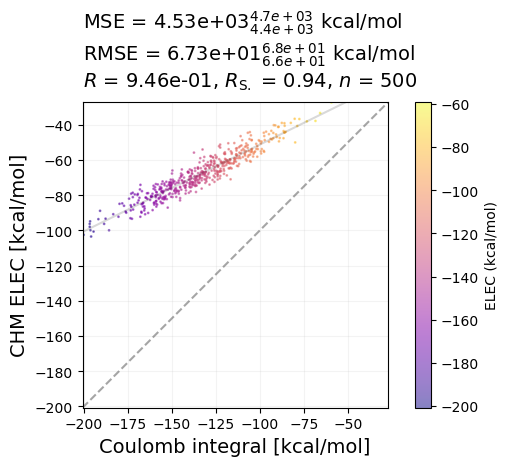

In [16]:
data_.plot_ecol()


## Interaction Energy

2.2947009120687146e-213


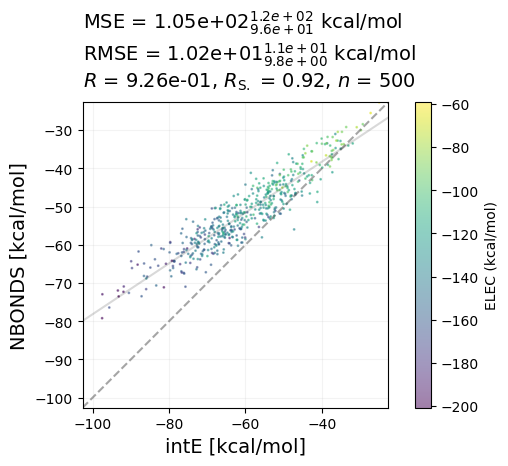

In [20]:
data_.plot_intE()


In [45]:
int_fit = data_.bonded_fit.get_loss_df(data_.bonded_fit.x)
int_fit

,m_ENERGY,monomer,a,r1,r2,m_E_tot,E_pred,SE,p_m_E_tot
key,,,,,,,,,
test0,14220.603566,210,1997.073143,19.677887,19.864797,956794.351964,20.202681,2.016514e+08,-958301.282546
test1,13384.206105,210,1965.575761,19.741090,19.520081,956794.349840,17.198373,1.786769e+08,-958304.286854
test10,6494.087047,210,2011.397177,19.574519,19.718058,956794.332342,12.845199,4.200650e+07,-958308.640028
test100,11027.623292,210,1987.913044,19.590182,19.688199,956794.343855,15.116995,1.212753e+08,-958306.368232
test101,3426.909161,210,2017.063334,19.617170,19.471589,956794.324552,7.912950,1.168954e+07,-958313.572276
...,...,...,...,...,...,...,...,...,...
test95,13506.086643,210,1989.104323,19.460292,19.855759,956794.350149,16.374955,1.819723e+08,-958305.110272
test96,14891.799012,210,1983.856307,19.754716,19.720927,956794.353669,19.933016,2.211724e+08,-958301.552211
test97,7644.421493,210,2023.585683,19.685425,19.768398,956794.335263,14.955246,5.820876e+07,-958306.529980


In [32]:
(int_fit["m_ENERGY"] - int_fit["m_ENERGY"].min())

test467_7      656.287692
test467_16     483.934996
test467_15     296.265035
test467_1     1344.556573
test467_19     535.600248
                 ...     
test66_18      191.158674
test66_15     2627.241635
test66_20     2123.984835
test66_2      2864.155223
test66_9       789.878653
Name: m_ENERGY, Length: 10000, dtype: float64

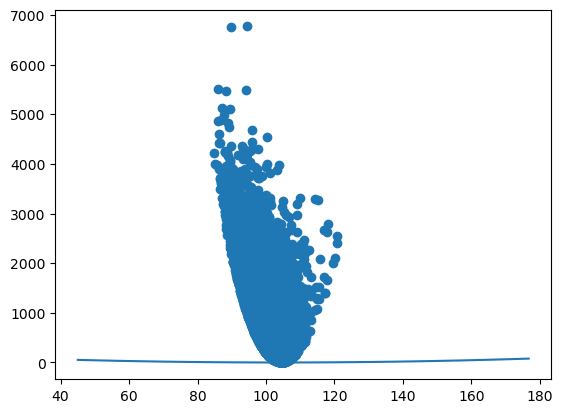

In [29]:
from ff_energy.ffe.bonded_terms import harmonic_angle
res = data_.bonded_fit.x

xrange = np.arange(np.pi / 4, np.pi, 0.1)
yvals = harmonic_angle(xrange, res[1], res[3])
plt.plot(np.rad2deg(xrange), yvals)
plt.scatter(int_fit["a"], int_fit["m_ENERGY"] - int_fit["m_ENERGY"].min())

## Interaction Energy

n: 393
8.905163484181679e-239


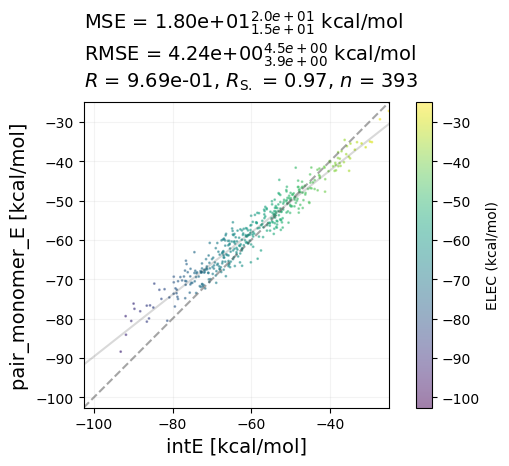

In [18]:
data_.plot_pair_monomer_E()